<a href="https://colab.research.google.com/github/afifavinaa/sentimen-ta/blob/main/sentimen_blu_TA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Blu by BCA Digital (9.303 data)

---



# Install libraries

In [ ]:
!conda install -y gdown
!pip install google-play-scraper

/bin/bash: conda: command not found


In [ ]:
!pip install PySastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 5.4 MB/s eta 0:00:00


# Import Library

In [ ]:
from google_play_scraper import Sort, reviews_all, reviews
import re
import pandas as pd
import numpy as np
import datetime as dt
import string
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
# from google_play_scraper import Sort, reviews_all, reviews
import nltk
# import calendar
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Mendapatkan ulasan pengguna tentang aplikasi blu dari web Google Play Store.

Dalam mengambil ulasan aplikasi Blu ini menggunakan library reviews untuk mendapatkan semua informasi yang akan digunakan untuk analisis, seperti reviewID, username, content, score, date, dll.

In [ ]:
# scraping review blu
blubca, continuation_token = reviews('com.bcadigital.blu', # defaults to 0
                                        lang='id', # defaults to 'id'
                                        country='id', # defaults to 'id'
                                        sort=Sort.NEWEST, # defaults to sort.MOST_RELEVANT
                                        count=9000)

In [ ]:
data_blubca = pd.DataFrame(blubca)
data_blubca

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,bcd42105-912e-4138-997f-650c6cd6d495,fitri yani,https://play-lh.googleusercontent.com/a/AAcHTt...,Kenapa sekarang transfer sesama BCA kena biaya..,2,0,1.36.0,2023-06-29 00:25:29,"Hai, Kak Fitri. Maaf atas ketidaknyamanannya. ...",2023-06-29 00:59:05,1.36.0
1,3fe51eeb-2c9e-4dfe-b6fc-bda124d7a3bc,Rangga Bramantio,https://play-lh.googleusercontent.com/a-/AD_cM...,Hadeh biaya transfer ke sesama blu maupun BCA ...,1,0,1.27.0,2023-06-29 00:24:10,"Hai, Kak Rangga. Maaf atas ketidaknyamanannya....",2023-06-29 00:56:17,1.27.0
2,b46c1bd4-9fe8-4f6a-8182-7cfeae2caf43,Adhy Saputra,https://play-lh.googleusercontent.com/a-/AD_cM...,Good,5,0,1.34.0,2023-06-28 23:19:01,"Hai, Kak Adhy, terima kasih atas ulasannya. Se...",2023-06-29 00:51:25,1.34.0
3,5542fd48-40cb-4e97-8434-1caefb657fc3,iqbal maulana,https://play-lh.googleusercontent.com/a/AAcHTt...,"skrng sering di suruh update terus , sampek ke...",1,0,None,2023-06-28 23:13:46,"Hai, Kak Iqbal. Maaf atas ketidaknyamanan yang...",2023-06-29 00:50:47,None
4,22fa748b-bb0b-4537-9d7f-4f2cc38ef562,sadri rangga,https://play-lh.googleusercontent.com/a-/AD_cM...,Ok,5,0,1.35.10,2023-06-28 21:25:46,"Hai, Kak Sadri. Terima kasih atas ulasannya. S...",2023-06-28 21:41:12,1.35.10
...,...,...,...,...,...,...,...,...,...,...,...
8995,e9e36fe0-6ee5-4532-864e-f38a6ca421f6,kobeto,https://play-lh.googleusercontent.com/a/AAcHTt...,uninstal app ecek² dah kayak orang gila foto g...,1,0,1.15.0,2022-03-12 08:52:57,Jika Kakak masih mengalami kendala mohon infor...,2022-03-12 09:50:40,1.15.0
8996,1ca48e02-ff88-45c1-8a67-bb3a4174d666,Dewi Susanti Siregar,https://play-lh.googleusercontent.com/a/AAcHTt...,👌bagus,5,0,1.14.0,2022-03-12 07:07:21,"Hai, Kak Dewi Susanti Siregar. Terima kasih at...",2022-03-12 08:42:17,1.14.0
8997,eeebab08-043f-415d-b58a-1d872f4c43f8,Nur Yakin,https://play-lh.googleusercontent.com/a/AAcHTt...,"Tampilan sederhana, mudah dimengerti dan tentu...",5,2,1.15.0,2022-03-12 06:19:37,"Hai, Kak Nur Yakin.Terima kasih atas reviewnya...",2022-03-12 08:41:25,1.15.0
8998,06b63656-a55c-4b76-87c6-5564435de0a5,Pariaji,https://play-lh.googleusercontent.com/a-/AD_cM...,Nice aplikasi,5,0,1.15.0,2022-03-12 06:11:17,"Hai, Kak Pariaji. Terima kasih atas ulasannya....",2022-03-12 08:40:33,1.15.0


In [ ]:
data_blubca.to_csv('blubca.csv', index=False)
data_blubca

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,bcd42105-912e-4138-997f-650c6cd6d495,fitri yani,https://play-lh.googleusercontent.com/a/AAcHTt...,Kenapa sekarang transfer sesama BCA kena biaya..,2,0,1.36.0,2023-06-29 00:25:29,"Hai, Kak Fitri. Maaf atas ketidaknyamanannya. ...",2023-06-29 00:59:05,1.36.0
1,3fe51eeb-2c9e-4dfe-b6fc-bda124d7a3bc,Rangga Bramantio,https://play-lh.googleusercontent.com/a-/AD_cM...,Hadeh biaya transfer ke sesama blu maupun BCA ...,1,0,1.27.0,2023-06-29 00:24:10,"Hai, Kak Rangga. Maaf atas ketidaknyamanannya....",2023-06-29 00:56:17,1.27.0
2,b46c1bd4-9fe8-4f6a-8182-7cfeae2caf43,Adhy Saputra,https://play-lh.googleusercontent.com/a-/AD_cM...,Good,5,0,1.34.0,2023-06-28 23:19:01,"Hai, Kak Adhy, terima kasih atas ulasannya. Se...",2023-06-29 00:51:25,1.34.0
3,5542fd48-40cb-4e97-8434-1caefb657fc3,iqbal maulana,https://play-lh.googleusercontent.com/a/AAcHTt...,"skrng sering di suruh update terus , sampek ke...",1,0,None,2023-06-28 23:13:46,"Hai, Kak Iqbal. Maaf atas ketidaknyamanan yang...",2023-06-29 00:50:47,None
4,22fa748b-bb0b-4537-9d7f-4f2cc38ef562,sadri rangga,https://play-lh.googleusercontent.com/a-/AD_cM...,Ok,5,0,1.35.10,2023-06-28 21:25:46,"Hai, Kak Sadri. Terima kasih atas ulasannya. S...",2023-06-28 21:41:12,1.35.10
...,...,...,...,...,...,...,...,...,...,...,...
8995,e9e36fe0-6ee5-4532-864e-f38a6ca421f6,kobeto,https://play-lh.googleusercontent.com/a/AAcHTt...,uninstal app ecek² dah kayak orang gila foto g...,1,0,1.15.0,2022-03-12 08:52:57,Jika Kakak masih mengalami kendala mohon infor...,2022-03-12 09:50:40,1.15.0
8996,1ca48e02-ff88-45c1-8a67-bb3a4174d666,Dewi Susanti Siregar,https://play-lh.googleusercontent.com/a/AAcHTt...,👌bagus,5,0,1.14.0,2022-03-12 07:07:21,"Hai, Kak Dewi Susanti Siregar. Terima kasih at...",2022-03-12 08:42:17,1.14.0
8997,eeebab08-043f-415d-b58a-1d872f4c43f8,Nur Yakin,https://play-lh.googleusercontent.com/a/AAcHTt...,"Tampilan sederhana, mudah dimengerti dan tentu...",5,2,1.15.0,2022-03-12 06:19:37,"Hai, Kak Nur Yakin.Terima kasih atas reviewnya...",2022-03-12 08:41:25,1.15.0
8998,06b63656-a55c-4b76-87c6-5564435de0a5,Pariaji,https://play-lh.googleusercontent.com/a-/AD_cM...,Nice aplikasi,5,0,1.15.0,2022-03-12 06:11:17,"Hai, Kak Pariaji. Terima kasih atas ulasannya....",2022-03-12 08:40:33,1.15.0


# Read the dataset

In [ ]:
blubca = pd.read_csv('blubca.csv')
blubca.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,bcd42105-912e-4138-997f-650c6cd6d495,fitri yani,https://play-lh.googleusercontent.com/a/AAcHTt...,Kenapa sekarang transfer sesama BCA kena biaya..,2,0,1.36.0,2023-06-29 00:25:29,"Hai, Kak Fitri. Maaf atas ketidaknyamanannya. ...",2023-06-29 00:59:05,1.36.0
1,3fe51eeb-2c9e-4dfe-b6fc-bda124d7a3bc,Rangga Bramantio,https://play-lh.googleusercontent.com/a-/AD_cM...,Hadeh biaya transfer ke sesama blu maupun BCA ...,1,0,1.27.0,2023-06-29 00:24:10,"Hai, Kak Rangga. Maaf atas ketidaknyamanannya....",2023-06-29 00:56:17,1.27.0
2,b46c1bd4-9fe8-4f6a-8182-7cfeae2caf43,Adhy Saputra,https://play-lh.googleusercontent.com/a-/AD_cM...,Good,5,0,1.34.0,2023-06-28 23:19:01,"Hai, Kak Adhy, terima kasih atas ulasannya. Se...",2023-06-29 00:51:25,1.34.0
3,5542fd48-40cb-4e97-8434-1caefb657fc3,iqbal maulana,https://play-lh.googleusercontent.com/a/AAcHTt...,"skrng sering di suruh update terus , sampek ke...",1,0,NaN,2023-06-28 23:13:46,"Hai, Kak Iqbal. Maaf atas ketidaknyamanan yang...",2023-06-29 00:50:47,NaN
4,22fa748b-bb0b-4537-9d7f-4f2cc38ef562,sadri rangga,https://play-lh.googleusercontent.com/a-/AD_cM...,Ok,5,0,1.35.10,2023-06-28 21:25:46,"Hai, Kak Sadri. Terima kasih atas ulasannya. S...",2023-06-28 21:41:12,1.35.10




---



# Data Exploration

## Displays the entire dataset column

In [ ]:
blubca.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion'],
      dtype='object')

## Summary

In [ ]:
# menampilkan ringkasan dataset yang berisi jumlah baris dan tipe data
info = blubca.info()
print('Info : ', info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              9000 non-null   object
 1   userName              9000 non-null   object
 2   userImage             9000 non-null   object
 3   content               9000 non-null   object
 4   score                 9000 non-null   int64 
 5   thumbsUpCount         9000 non-null   int64 
 6   reviewCreatedVersion  7838 non-null   object
 7   at                    9000 non-null   object
 8   replyContent          9000 non-null   object
 9   repliedAt             9000 non-null   object
 10  appVersion            7838 non-null   object
dtypes: int64(2), object(9)
memory usage: 773.6+ KB
Info :  None


## Find Missing Values

In [ ]:
# menghitung dan menampilkan missing values
print('Jumlah missing values disetiap kolom:\n', blubca.isnull().sum())

Jumlah missing values disetiap kolom:
 reviewId                   0
userName                   0
userImage                  0
content                    0
score                      0
thumbsUpCount              0
reviewCreatedVersion    1162
at                         0
replyContent               0
repliedAt                  0
appVersion              1162
dtype: int64


Ada 2 kolom yang mempunyai banyak missing values berjumlah 1000, yaitu reviewCreatedVersion dan appVersion. Kolom reviewCreatedVersion dan appVersion tidak dilakukan pengisian nilai karena berisi balasan ulasan yang diberikan oleh pihak Blu terhadap ulasan pengguna dan tanggal balasannya. Sedangkan missing values yang terdapat di kolom reviewCreatedVersion tidak diisi karena berisi versi dari aplikasi Blu.

Ada 2 kolom yang mempunyai banyak missing values berjumlah 1000, yaitu replyContent dan repliedAt. Selain itu, terdapat kolom yang berisi missing values yang berjumlah 300 NaN, yaitu reviewCreatedVersion. Kolom replyContent dan repliedAt tidak dilakukan pengisian nilai karena berisi balasan ulasan yang diberikan oleh pihak Blu terhadap ulasan pengguna dan tanggal balasannya. Sedangkan missing values yang terdapat di kolom reviewCreatedVersion tidak diisi karena berisi versi dari aplikasi Blu.

## Remove Missing Values

In [ ]:
# menghapus kolom replyContent, repliedAt, dan reviewCreatedVersion yang berisi missing values
blubca = blubca.drop(['replyContent','repliedAt','reviewCreatedVersion'], axis=1)
blubca.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,at,appVersion
0,bcd42105-912e-4138-997f-650c6cd6d495,fitri yani,https://play-lh.googleusercontent.com/a/AAcHTt...,Kenapa sekarang transfer sesama BCA kena biaya..,2,0,2023-06-29 00:25:29,1.36.0
1,3fe51eeb-2c9e-4dfe-b6fc-bda124d7a3bc,Rangga Bramantio,https://play-lh.googleusercontent.com/a-/AD_cM...,Hadeh biaya transfer ke sesama blu maupun BCA ...,1,0,2023-06-29 00:24:10,1.27.0
2,b46c1bd4-9fe8-4f6a-8182-7cfeae2caf43,Adhy Saputra,https://play-lh.googleusercontent.com/a-/AD_cM...,Good,5,0,2023-06-28 23:19:01,1.34.0
3,5542fd48-40cb-4e97-8434-1caefb657fc3,iqbal maulana,https://play-lh.googleusercontent.com/a/AAcHTt...,"skrng sering di suruh update terus , sampek ke...",1,0,2023-06-28 23:13:46,NaN
4,22fa748b-bb0b-4537-9d7f-4f2cc38ef562,sadri rangga,https://play-lh.googleusercontent.com/a-/AD_cM...,Ok,5,0,2023-06-28 21:25:46,1.35.10


## Rename the columns

In [ ]:
# mengganti nama kolom tanggal
blubca.rename(columns={'at':'date'},inplace=True)
print('mengecek nama kolom yang sudah diganti:', blubca.columns)

mengecek nama kolom yang sudah diganti: Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'date', 'appVersion'],
      dtype='object')


## Separate the date in the timestamp of the At column

In [ ]:
# memisahkan tanggal yang terletak di timestamps
blubca['date'] = pd.to_datetime(blubca['date']).dt.date
blubca.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,date,appVersion
0,bcd42105-912e-4138-997f-650c6cd6d495,fitri yani,https://play-lh.googleusercontent.com/a/AAcHTt...,Kenapa sekarang transfer sesama BCA kena biaya..,2,0,2023-06-29,1.36.0
1,3fe51eeb-2c9e-4dfe-b6fc-bda124d7a3bc,Rangga Bramantio,https://play-lh.googleusercontent.com/a-/AD_cM...,Hadeh biaya transfer ke sesama blu maupun BCA ...,1,0,2023-06-29,1.27.0
2,b46c1bd4-9fe8-4f6a-8182-7cfeae2caf43,Adhy Saputra,https://play-lh.googleusercontent.com/a-/AD_cM...,Good,5,0,2023-06-28,1.34.0
3,5542fd48-40cb-4e97-8434-1caefb657fc3,iqbal maulana,https://play-lh.googleusercontent.com/a/AAcHTt...,"skrng sering di suruh update terus , sampek ke...",1,0,2023-06-28,NaN
4,22fa748b-bb0b-4537-9d7f-4f2cc38ef562,sadri rangga,https://play-lh.googleusercontent.com/a-/AD_cM...,Ok,5,0,2023-06-28,1.35.10


In [ ]:
# memisahkan tahun dan bulan
blubca['year'] = pd.to_datetime(blubca['date']).dt.year
blubca['month'] = pd.to_datetime(blubca['date']).dt.month
# blubca['month'] = blubca['month'].apply(lambda x: calendar.month_abbr[x])

# Data Visualization

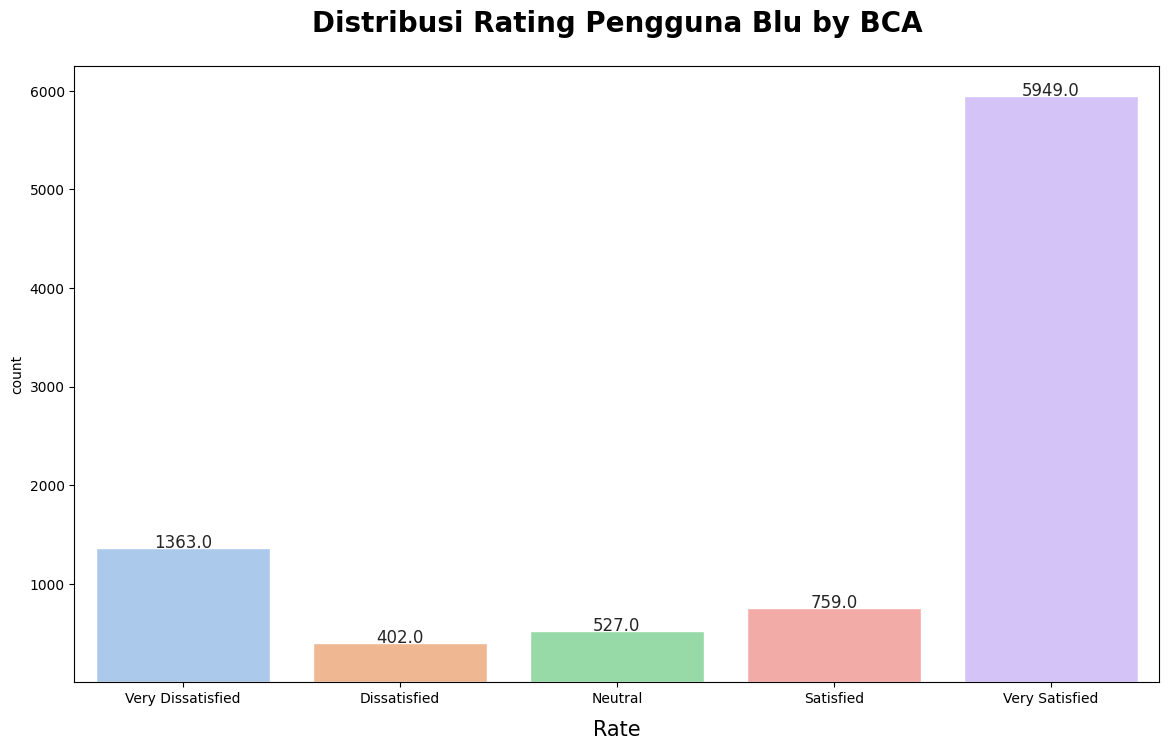

In [ ]:
# visualisasi bar chart untuk melihat jumlah rating pengguna blubca
fig, ax = plt.subplots(figsize=(14,8))
position = (0,1,2,3,4)
labels = ("Very Dissatisfied","Dissatisfied","Neutral","Satisfied","Very Satisfied")

ax = sns.set_style('whitegrid')
ax = sns.countplot(x="score", data=blubca, palette="pastel")

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,
             rect.get_height()+ 3.25,rect.get_height(),
             horizontalalignment='center', fontsize = 12)

plt.title('Distribusi Rating Pengguna Blu by BCA', fontsize=20, fontweight='bold', pad=25)
plt.xlabel('Rate', fontsize=15, labelpad=10)
plt.xticks(position, labels)
plt.ylim(1)
plt.show()

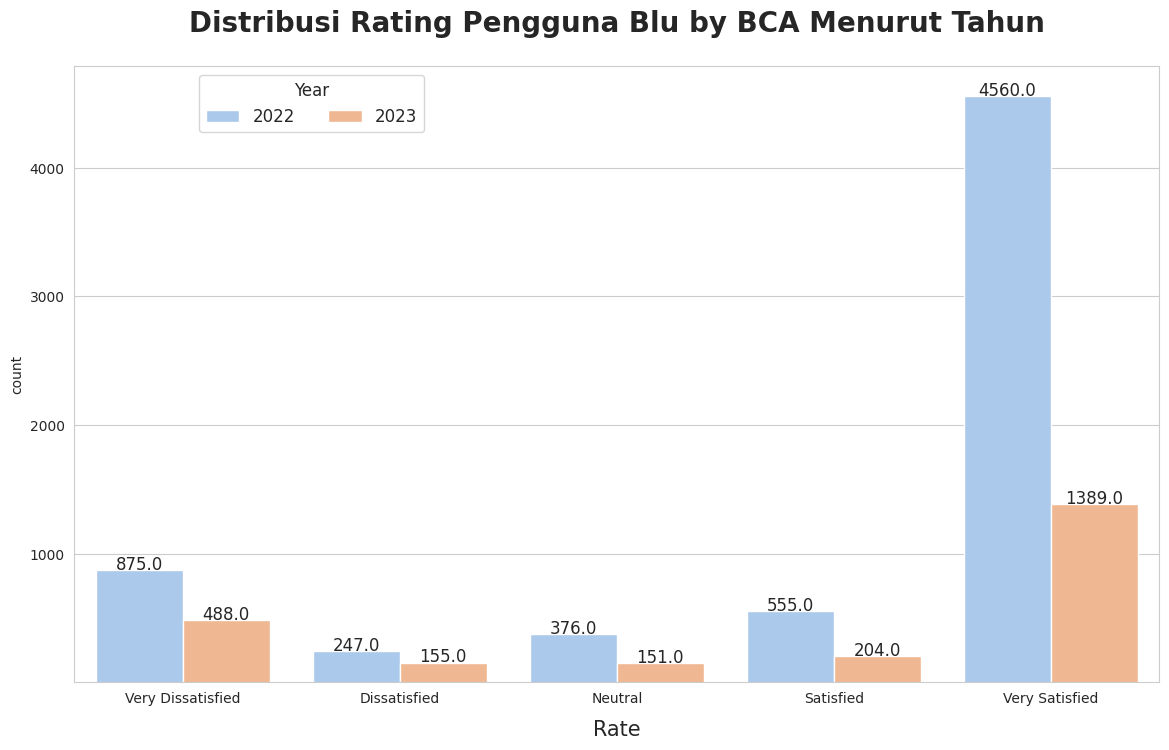

In [ ]:
# mem-breakdown bar chart pada sel sebelumnya berdasarkan tahun
fig, ax = plt.subplots(figsize=(14,8))
position = (0,1,2,3,4)
labels = ("Very Dissatisfied","Dissatisfied","Neutral","Satisfied","Very Satisfied")

ax = sns.set_style('whitegrid')
ax = sns.countplot(x="score", hue="year", data=blubca, palette="pastel")

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,
             rect.get_height()+ 3.25,rect.get_height(),
             horizontalalignment='center', fontsize = 12)

plt.legend(fontsize=12, bbox_to_anchor=(0.33,1), ncol = 3, title="Year", title_fontsize=12)
plt.title('Distribusi Rating Pengguna Blu by BCA Menurut Tahun', fontsize=20,
          fontweight='bold', pad=25)
plt.xlabel('Rate', fontsize=15, labelpad=10)
plt.xticks(position, labels)
plt.ylim(1)
plt.show()

## Delete unnecessary columns and does not provide any information.

In [ ]:
blubca.drop(['reviewId','userName','userImage','score','thumbsUpCount','date','year','month'], axis=1, inplace=True)

In [ ]:
blubca.drop(['appVersion'], axis=1, inplace=True)

In [ ]:
print('Ringkasan dataset setelah dilakukan manipulasi data', blubca.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  9000 non-null   object
dtypes: object(1)
memory usage: 70.4+ KB
Ringkasan dataset setelah dilakukan manipulasi data None


In [ ]:
blubca.head()

,content
0,Kenapa sekarang transfer sesama BCA kena biaya..
1,Hadeh biaya transfer ke sesama blu maupun BCA ...
2,Good
3,"skrng sering di suruh update terus , sampek ke..."
4,Ok


## Delete Duplicate Data that contain in the content column

In [ ]:
# menghitung jumlah ulasan yang duplikasi
blubca.duplicated().sum()

1589

In [ ]:
# menghapus duplikasi ulasan agar nantinya model tidak mempelajari kata yang sama secara berulang
blubca.drop_duplicates(inplace=True)

In [ ]:
# mengecek kembali jumlah duplikat setelah di hapus
blubca.duplicated().sum()

0

Ulasan sudah bersih dari duplikasi dan siap untuk melanjutkan proses, yaitu persiapan data untuk membersihkan ulasan dari emoji, tanda baca, ketidakserasian jenis huruf, pengulangan kata, normalisasi, dll.



---



# Pre-processing

## Case Folding

In [ ]:
# merubah jenis huruf menjadi huruf kecil
def lowercase(review_text):
  low = review_text.lower()
  return low

blubca['clean_review'] = blubca['content'].apply(lambda low:lowercase(str(low)))

In [ ]:
blubca.head()

,content,clean_review
0,Kenapa sekarang transfer sesama BCA kena biaya..,kenapa sekarang transfer sesama bca kena biaya..
1,Hadeh biaya transfer ke sesama blu maupun BCA ...,hadeh biaya transfer ke sesama blu maupun bca ...
2,Good,good
3,"skrng sering di suruh update terus , sampek ke...","skrng sering di suruh update terus , sampek ke..."
4,Ok,ok


# Cleaning Data

## Remove the emoji of the text.

In [ ]:
# menghapus emoji menggunakan regex dan nilai unicode dari emoji

def remove_emoji(review_text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', review_text)

blubca['clean_review'] = blubca['clean_review'].apply(lambda emoji: remove_emoji(emoji))

In [ ]:
blubca.head(-3)

,content,clean_review
0,Kenapa sekarang transfer sesama BCA kena biaya..,kenapa sekarang transfer sesama bca kena biaya..
1,Hadeh biaya transfer ke sesama blu maupun BCA ...,hadeh biaya transfer ke sesama blu maupun bca ...
2,Good,good
3,"skrng sering di suruh update terus , sampek ke...","skrng sering di suruh update terus , sampek ke..."
4,Ok,ok
...,...,...
8991,"mantap, memudahkan saya dlm bertransaksi online","mantap, memudahkan saya dlm bertransaksi online"
8992,Ribet prosesnya,ribet prosesnya
8993,Sudah 50 kali pengenalan wajah tapi tidak ada ...,sudah 50 kali pengenalan wajah tapi tidak ada ...
8995,uninstal app ecek² dah kayak orang gila foto g...,uninstal app ecek² dah kayak orang gila foto g...


## remove hashtag

In [ ]:
# menghapus hashtag dari ulasan yang biasanya digunakan oleh pengguna untuk memberikan tagar
# terkait topik dari ulasan yang diutarakan

def remove_hashtag(review_text, default_replace=""):
  hashtag = re.sub(r'#\w+', default_replace, review_text)
  return hashtag

blubca['clean_review'] = blubca['clean_review'].apply(lambda hashtag: remove_hashtag(hashtag))

In [ ]:
blubca.head(-3)

,content,clean_review
0,Kenapa sekarang transfer sesama BCA kena biaya..,kenapa sekarang transfer sesama bca kena biaya..
1,Hadeh biaya transfer ke sesama blu maupun BCA ...,hadeh biaya transfer ke sesama blu maupun bca ...
2,Good,good
3,"skrng sering di suruh update terus , sampek ke...","skrng sering di suruh update terus , sampek ke..."
4,Ok,ok
...,...,...
8991,"mantap, memudahkan saya dlm bertransaksi online","mantap, memudahkan saya dlm bertransaksi online"
8992,Ribet prosesnya,ribet prosesnya
8993,Sudah 50 kali pengenalan wajah tapi tidak ada ...,sudah 50 kali pengenalan wajah tapi tidak ada ...
8995,uninstal app ecek² dah kayak orang gila foto g...,uninstal app ecek² dah kayak orang gila foto g...


## remove punctuation and number

In [ ]:
# menghapus angka dalam ulasan

def remove_number(review_text, default_replace=" "):
  num = re.sub(r'\d+', default_replace, review_text)
  return num

blubca['clean_review'] = blubca['clean_review'].apply(lambda num: remove_number(num))

In [ ]:
# menghapus tanda baca

def remove_punctuation(review_text, default_text=" "):
  list_punct = string.punctuation
  delete_punct = str.maketrans(list_punct,' '*len(list_punct))
  new_review = ' '.join(review_text.translate(delete_punct).split())

  return new_review

blubca['clean_review'] = blubca['clean_review'].apply(lambda punct: remove_punctuation(punct))

In [ ]:
# menghapus superscript dalam ulasan yang biasa digunakan oleh pengguna dalam mengulangi kata

def remove_superscript(review_text):
  number = re.compile("["u"\U00002070"
                      u"\U000000B9"
                      u"\U000000B2-\U000000B3"
                      u"\U00002074-\U00002079"
                      u"\U0000207A-\U0000207E"
                      u"U0000200D"
                      "]+", flags=re.UNICODE)
  return number.sub(r'', review_text)

blubca['clean_review'] = blubca['clean_review'].apply(lambda num: remove_superscript(num))

In [ ]:
blubca.head(-3)

,content,clean_review
0,Kenapa sekarang transfer sesama BCA kena biaya..,kenapa sekarang transfer sesama bca kena biaya
1,Hadeh biaya transfer ke sesama blu maupun BCA ...,hadeh biaya transfer ke sesama blu maupun bca ...
2,Good,good
3,"skrng sering di suruh update terus , sampek ke...",skrng sering di suruh update terus sampek kese...
4,Ok,ok
...,...,...
8991,"mantap, memudahkan saya dlm bertransaksi online",mantap memudahkan saya dlm bertransaksi online
8992,Ribet prosesnya,ribet prosesnya
8993,Sudah 50 kali pengenalan wajah tapi tidak ada ...,sudah kali pengenalan wajah tapi tidak ada yan...
8995,uninstal app ecek² dah kayak orang gila foto g...,uninstal app ecek dah kayak orang gila foto go...


## remove words repetition

In [ ]:
# melakukan pembatasan jumlah huruf menjadi dua untuk mengembalikan kata ke bentuk awal
# dan menghindari terjadinya kata ganda yang memiliki arti sama tetapi berbeda penulisan

def word_repetition(review_text):
  review = re.sub(r'(.)\1+', r'\1\1', review_text)
  return review

blubca['clean_review'] = blubca['clean_review'].apply(lambda word: word_repetition(word))

In [ ]:
# melakukan pembatasan kata berulang menjadi satu kali, seperti suka suka -> suka

def repetition(review_text):
  repeat = re.sub(r'\b(\w+)(?:\W\1\b)+', r'\1',review_text, flags=re.IGNORECASE)
  return repeat

blubca['clean_review'] = blubca['clean_review'].apply(lambda word: repetition(word))

## remove whitespaces

Meskipun telah dibersihkan, ulasan masih bisa mengandung spasi ganda yang dapat berasal dari pengguna ketika mengetik ataupun ketika melakukan pembersihan ulasan. Maka dari itu, menghapus spasi ganda diperlukan.

In [ ]:
# menghapus spasi berlebih dalam ulasan

def remove_extra_whitespaces(review_text):
  review = re.sub(r'\s+',' ', review_text)
  return review

blubca['clean_review'] = blubca['clean_review'].apply(lambda extra_spaces: remove_extra_whitespaces(extra_spaces))

## remove another words which doesn't give any information

Ulasan pengguna tidak hanya berisi kata yang bisa ditafsirkan atau dimengerti oleh manusia. Ada kalanya pengguna memberikan informasi berupa kode voucher, ketawa, atau kata abstrak yang tidak bisa/sulit diterjemahkan. Dimana kata tersebut bisa membingungkan orang yang menganalisisnya karena tidak tahu arti dari kata tersebut. Maka dari itu, saya melakukan pembersihan secara mendalam dengan menghapus seluruh kata abstrak yang nantinya tidak memberikan informasi apapun kepada model dan hanya menghambat kinerja model.

In [ ]:
bannedword = ['rahmafgk3', 'rizkawzl0', 'yasintwdh', 'referal', ' fitriyxk0', 'refferal', 'sofyawqxl',
         'stepvfks5','darmexqzg ','z khoirsgrc','darmexqzg' ,'asepmkxwf' ,'rosiaaqjh', ' dedisnzuy',
         'muhamcpvl', 'trihascqh', 'ramadcaho', 'ridwaoefm', 'uconneydm', 'mfirmyb1g', 'candrxibe'
         'wkwk','wkwkw','wkwkwk','hihi','hihihii','hihihi','hehehe','hehehehe','hehe','huhu','huhuu',
         'ancok','guak','cokcok','hhmm','annya','huftt', 'sahalyne', 'ninamslyp', 'febigovoe', 'antonfsaa',
         'didikxawo', 'solihvris', 'asepdqycu', 'agussjzg5', 'novalzpvk', 'ahmadtmld', 'wantoxbwy', 'alpriohok',
         'dimasdfec','adeluilgp', 'nourfonlp', 'muhamctkp', 'sigitdct5', 'dianriznj', 'harumkpt7',  'youpigvew',
         'anggalnoh', 'azharvriv', 'uqjy', 'dehdje', 'jwdnmb', 'wxvlezuvws', 'ircel', 'swjjw', 'dmv','dxrgz',
         'qjtajuq','zzhwntdft','xywrfw' ,'fztnmdrrduy' ,'xsezuz', 'kbyv', 'iyyveyzqkdgm', 'arlrmdjy', 'sfarif',
         'sfomar', 'nzxx', 'mtsco']

re_banned_words = re.compile(r"\b(" + "|".join(bannedword) + ")\\W", re.I)

def RemoveBannedWords(toPrint):
    global re_banned_words
    return re_banned_words.sub("", toPrint)

blubca['clean_review'] = blubca['clean_review'].apply(lambda banned:RemoveBannedWords(banned))

## change slang into standard terms (Normalization Phase)

Menormalisasikan kata singkat dan tidak baku menjadi kata baku sesuai dengan KBBI.

In [ ]:
!gdown --id 10Og7g4MrEHcd3Mk2TIEoEYklGmrhV-Cs

slangs = open('slang.txt',"r",encoding="utf-8", errors='replace')

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=10Og7g4MrEHcd3Mk2TIEoEYklGmrhV-Cs
To: /content/slang.txt
100% 32.2k/32.2k [00:00<00:00, 61.7MB/s]


In [ ]:
clear_slangs= []
for newlines in slangs:
  strip_re = newlines.strip("\n")
  split = re.split(r'[:]',strip_re)
  clear_slangs.append(split)

print(clear_slangs)

[['& ', ' dan'], ['aah ', ' ah'], ['abis ', ' habis'], ['abis ', ' habis'], ['abisa ', ' bisa'], ['abng ', ' abang'], ['acc ', ' terima'], ['account ', ' akun'], ['ad ', ' ada'], ['adain ', ' bikin'], ['adl ', ' adalah'], ['adlah ', ' adalah'], ['adlh ', ' adalah'], ['adminnya ', ' admin nya'], ['adoh ', ' aduh'], ['adukan ', ' komplain'], ['aee ', ' aja'], ['afordable ', ' affordable'], ['aga ', ' agak'], ['agent ', ' agen'], ['agus ', ' hangus'], ['aidik ', ' sidik'], ['aj ', ' saja'], ['aja ', ' saja'], ['ajak2 ', ' ajak ajak'], ['ajh ', 'saja'], ['ajj ', ' saja'], ['ajuin ', ' mengajukan'], ['ak ', ' aku'], ['akn ', ' akan'], ['akuratin ', ' akurat in'], ['akutu ', ' aku tuh'], ['alamt ', ' alamat'], ['alhamdulilah ', ' alhamdulillah'], ['alhamdulillaah ', ' alhamdulillah'], ['alhamdulillah ', ' alhamdulillah'], ['alhamdullilah ', ' alhamdulillah'], ['alhmdulillah ', ' alhamdulillah'], ['alhmdulillah ', ' alhamdulillah'], ['alih2 ', ' alih alih'], ['almat ', ' alamat'], ['almt ', '

In [ ]:
slangs = [[k.strip(), v.strip()] for k,v in clear_slangs]
dict_slangs = {key:values for key,values in slangs}
dict_slangs

{'&': 'dan',
 'aah': 'ah',
 'abis': 'habis',
 'abisa': 'bisa',
 'abng': 'abang',
 'acc': 'terima',
 'account': 'akun',
 'ad': 'ada',
 'adain': 'bikin',
 'adl': 'adalah',
 'adlah': 'adalah',
 'adlh': 'adalah',
 'adminnya': 'admin nya',
 'adoh': 'aduh',
 'adukan': 'komplain',
 'aee': 'aja',
 'afordable': 'affordable',
 'aga': 'agak',
 'agent': 'agen',
 'agus': 'hangus',
 'aidik': 'sidik',
 'aj': 'saja',
 'aja': 'saja',
 'ajak2': 'ajak ajak',
 'ajh': 'saja',
 'ajj': 'saja',
 'ajuin': 'mengajukan',
 'ak': 'aku',
 'akn': 'akan',
 'akuratin': 'akurat in',
 'akutu': 'aku tuh',
 'alamt': 'alamat',
 'alhamdulilah': 'alhamdulillah',
 'alhamdulillaah': 'alhamdulillah',
 'alhamdulillah': 'alhamdulillah',
 'alhamdullilah': 'alhamdulillah',
 'alhmdulillah': 'alhamdulillah',
 'alih2': 'alih alih',
 'almat': 'alamat',
 'almt': 'alamat',
 'almtnya': 'alamatnya',
 'alpukatnya': 'alpukat nya',
 'alpulat': 'alpukat',
 'alumunium': 'aluminium',
 'ama': 'sama',
 'amanh': 'amanah',
 'ambilin': 'ambilkan',
 '

In [ ]:
clean_text = []
for review in blubca['clean_review']:
  wordlist = TextBlob(review).words
  for k,v in enumerate(wordlist):
    if v in dict_slangs.keys():
      wordlist[k] = dict_slangs[v]
  clean_text.append(' '.join(wordlist))

In [ ]:
clean_text

['kenapa sekarang transfer sesama bca kena biaya',
 'hadeh biaya transfer ke sesama blu maupun bca sekarang dikenakan transfer sudah minggu lebih setelah di diperbarui menu virtual akun tidak bisa digunakan sudah dan selalu muncul notifikasi blu sedang menyiapkan sesuatu untuk kamu pihak blu mau menyiapkan sesuatu berapa lama sampai fitur virtual account bisa digunakan kembali seminggu sebulan atau setahun',
 'bagus',
 'sekarang sering di suruh diperbarui terus sampai kesel padahal setelah diperbarui tetap saja lambat buka apa lama di hapusin filenya tetap saja',
 'oke',
 'diperbarui melulu',
 'selama pakai blu transfer ke sumua rekening bca tanpa biaya tapi kali ini kok bisa kena biaya ya',
 'the terbaik and always the terbaik',
 'sip tidak rumit tinggal ada paket data kuota saja',
 'blu bca digital keren terima kasih walaupun saya di malaysia tetap bisa diaktifkan dan digunakan untuk transaksi',
 'sudah didownload tapi pas mau melakukan pendaftaran tidak bisa sms kode angka untuk pen

In [ ]:
blubca['normalization'] = clean_text

In [ ]:
blubca.head()

,content,clean_review,normalization
0,Kenapa sekarang transfer sesama BCA kena biaya..,kenapa sekarang transfer sesama bca kena biaya,kenapa sekarang transfer sesama bca kena biaya
1,Hadeh biaya transfer ke sesama blu maupun BCA ...,hadeh biaya transfer ke sesama blu maupun bca ...,hadeh biaya transfer ke sesama blu maupun bca ...
2,Good,good,bagus
3,"skrng sering di suruh update terus , sampek ke...",skrng sering di suruh update terus sampek kese...,sekarang sering di suruh diperbarui terus samp...
4,Ok,ok,oke


## delete words containing 3 letters

Setelah melakukan analisis terhadap ulasan yang telah bersih, menghapus kata abstrak tidak cukup untuk membuat ulasan bersih karena masih ditemukan beberapa kata yang tidak sesuai dan membingungkan. Oleh karena itu, saya melakukan penghapusan kata yang terdiri dari 3 huruf, seperti oh, iya, ini, itu, dll, dan tidak memberikan informasi penting bagi model saat melakukan prediksi.

In [ ]:
def remove_small_words(text):
  text = re.sub(r'\b\w{1,3}\b','',text)
  return text

In [ ]:
blubca['final_text'] = blubca['normalization'].apply(lambda remove: remove_small_words(str(remove)))

# Word Tokenizing

In [ ]:
def word_token(review_text):
  return word_tokenize(review_text)

In [ ]:
blubca['token'] = blubca['final_text'].apply(lambda tokenize:word_token(str(tokenize)))

In [ ]:
blubca.head()

,content,clean_review,normalization,final_text,token
0,Kenapa sekarang transfer sesama BCA kena biaya..,kenapa sekarang transfer sesama bca kena biaya,kenapa sekarang transfer sesama bca kena biaya,kenapa sekarang transfer sesama kena biaya,"[kenapa, sekarang, transfer, sesama, kena, biaya]"
1,Hadeh biaya transfer ke sesama blu maupun BCA ...,hadeh biaya transfer ke sesama blu maupun bca ...,hadeh biaya transfer ke sesama blu maupun bca ...,hadeh biaya transfer sesama maupun sekarang...,"[hadeh, biaya, transfer, sesama, maupun, sekar..."
2,Good,good,bagus,bagus,[bagus]
3,"skrng sering di suruh update terus , sampek ke...",skrng sering di suruh update terus sampek kese...,sekarang sering di suruh diperbarui terus samp...,sekarang sering suruh diperbarui terus sampai...,"[sekarang, sering, suruh, diperbarui, terus, s..."
4,Ok,ok,oke,,[]


# Wordcloud Visualization

In [ ]:
review_all = []

for review in blubca['final_text']:
  text = review.split()
  for token_review in text:
    print(token_review)
    review_all.append(token_review)

Streaming output truncated to the last 5000 lines.
pakai
aplikasi
tidak
rumit
tidak
gangguan
juga
terus
untuk
transaksi
cepat
banget
semoga
sampai
terus
kedepannya
lancar
tidak
gangguan
maantap
cepat
mudah
bagaimana
cara
tarik
dana
tunai
semoga
lancar
hari
saya
dinyatakan
gagal
pembuatan
rekening
blubca
karena
foto
diri
saya
buram
terima
kasih
untuk
waktu
memang
mantap
cepat
bebas
biaya
transfer
bank
lain
cakep
salah
aplikasi
saya
pikir
bisa
dapat
kartu
setelah
buka
rekening
tidak
tahu
sama
saja
walet
setor
tunai
susah
minta
ampun
aplikasi
sangat
bermanfaat
membantu
terima
kasih
baru
coba
aplikasi
pakai
nomor
atau
seperti
aplikasi
dana
penjelasanya
dhunk
susah
untuk
mendeteksi
pengenalan
wajah
sudah
bagus
simpel
kalau
bisa
syari
juga
biar
makin
berkah
ditambah
kartu
debet
sangat
mudah
help
full
terbaik
sangat
mudah
praktis
pemakaian
semua
proses
transaksi
tidak
pakai
lama
semua
lancar
tidak
bisa
transfer
virtual
akun
tidak
repot
lagi
bawa
mana
mana
sangat
bagus
terpercaya
hebat
nyaman


In [ ]:
# menampilkan kata dengan jumlah kemunculan yang paling dibahas oleh pengguna

freq_dist = FreqDist(review_all)
print("how many frequency distribution samples from an entire blubca's review")
freq_dist

how many frequency distribution samples from an entire blubca's review


FreqDist({'tidak': 2447, 'bisa': 1707, 'saya': 1641, 'aplikasi': 1429, 'sudah': 1224, 'sangat': 964, 'yang': 924, 'bagus': 906, 'banget': 842, 'untuk': 819, ...})

In [ ]:
# menampilkan 500 kata yang paling sering muncul

common_review = freq_dist.most_common(500)
print(common_review)

[('tidak', 2447), ('bisa', 1707), ('saya', 1641), ('aplikasi', 1429), ('sudah', 1224), ('sangat', 964), ('yang', 924), ('bagus', 906), ('banget', 842), ('untuk', 819), ('mudah', 700), ('pakai', 686), ('transfer', 657), ('mantap', 651), ('saja', 643), ('lagi', 635), ('transaksi', 617), ('tapi', 615), ('bank', 584), ('kalau', 552), ('terus', 496), ('kasih', 475), ('jadi', 463), ('buat', 462), ('juga', 453), ('digital', 451), ('lebih', 435), ('masuk', 406), ('membantu', 406), ('lain', 402), ('terima', 400), ('dari', 386), ('kenapa', 375), ('padahal', 373), ('fitur', 365), ('biaya', 350), ('dengan', 349), ('cepat', 344), ('kartu', 342), ('rekening', 337), ('tolong', 329), ('sama', 324), ('semoga', 319), ('masih', 310), ('banyak', 307), ('belum', 304), ('harus', 303), ('buka', 291), ('keren', 290), ('rumit', 286), ('sekali', 281), ('susah', 279), ('tunai', 277), ('gagal', 276), ('verifikasi', 269), ('admin', 268), ('suka', 264), ('saldo', 262), ('selalu', 261), ('login', 259), ('wajah', 257

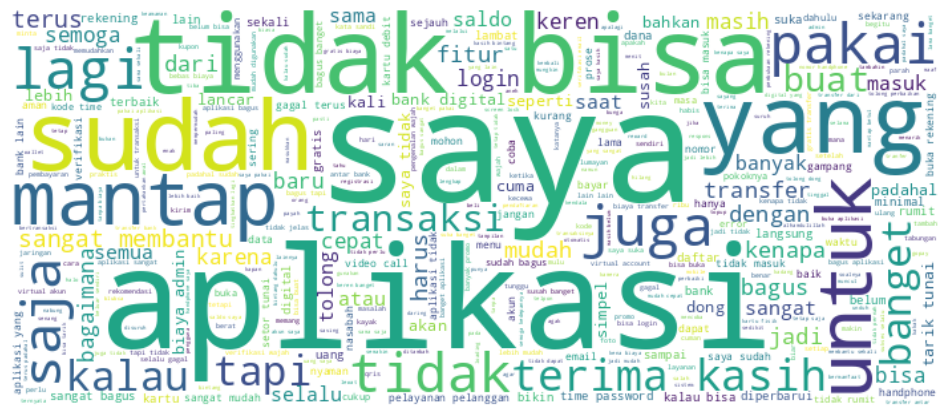

In [ ]:
# membuat visualisasi WordCloud

join_review = ' '.join(review_all)

w_cloud = WordCloud(background_color="white",
                    width=700, height=300, max_font_size=120,
                    max_words=500, contour_color='blue',
                    contour_width=2).generate(str(join_review))

# plot wordcloud
plt.figure(figsize=(12,12))
plt.imshow(w_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# memasukkan 500 sampel kata beserta jumlah kemunculan ke dalam dataframe

most_freq_df = pd.DataFrame(common_review, columns=['words','count'])
most_freq_df.sort_values(by='count', ascending=False)

,words,count
0,tidak,2447
1,bisa,1707
2,saya,1641
3,aplikasi,1429
4,sudah,1224
...,...,...
483,jago,18
482,tersedia,18
481,lihat,18
480,notifikasi,18


In [ ]:
# mengurutkan kata sampel berdasarkan jumlah kemunculan yang diurutkan secara descending
# kemudian mengambil 15 kata sampel

most_freq_df.sort_values(by='count', ascending=False)
top15 = most_freq_df.iloc[:15]

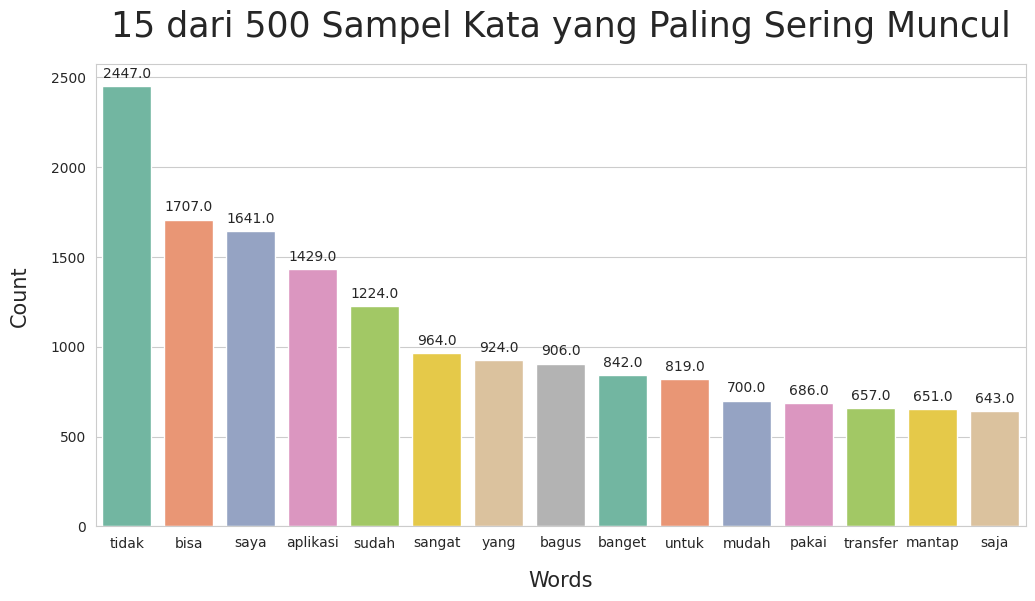

In [ ]:
# membuat visualisasi 15 sampel kata yang paling sering dibicarakan oleh pengguna

plt.figure(figsize=(12,6))
sns.set_style('whitegrid')

ax = sns.barplot(x='words', y='count', data=top15, palette = 'Set2')
for annotate in ax.patches:
  ax.annotate(format(annotate.get_height(), '.1f'),
              (annotate.get_x() + annotate.get_width()/2.,
               annotate.get_height()), ha = 'center', va='center', xytext=(0,9),
               textcoords = 'offset points')
plt.title("15 dari 500 Sampel Kata yang Paling Sering Muncul", fontsize=25, pad=20)
plt.xlabel('Words', fontsize=15, labelpad=15)
plt.ylabel('Count', fontsize=15, labelpad=15)
plt.show()

# Remove Stopword in bahasa

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('popular')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data] 

True

In [ ]:
# menampilkan kata stopwords bahasa indonesia
indonesian_stop = stopwords.words('indonesian')

# menghitung jumlah kata stopwords bahasa indonesia
print('length of indonesian stopwords:', len(indonesian_stop))

length of indonesian stopwords: 758


In [ ]:
# memasukkan stopwords bahasa indonesia ke dalam dataframe

stopwords_indo = pd.DataFrame(indonesian_stop, columns=['stopwords_indonenesia'])

In [ ]:
# menyimpan stopwords bahasa indonesia ke dalam format xlsx
stopwords_indo.to_excel('stopwords_indonesian.xlsx', index=False)

## function that used to remove stopwords

In [ ]:
def remove_stopwords(review_text, indo_stopwords):
  tokenize = []
  for token in review_text:
    if token not in indo_stopwords:
      tokenize.append(token)

  return tokenize

blubca['stop_review'] = blubca['token'].apply(lambda stop: remove_stopwords(stop, indonesian_stop))

In [ ]:
blubca.head()

,content,clean_review,normalization,final_text,token,stop_review
0,Kenapa sekarang transfer sesama BCA kena biaya..,kenapa sekarang transfer sesama bca kena biaya,kenapa sekarang transfer sesama bca kena biaya,kenapa sekarang transfer sesama kena biaya,"[kenapa, sekarang, transfer, sesama, kena, biaya]","[transfer, kena, biaya]"
1,Hadeh biaya transfer ke sesama blu maupun BCA ...,hadeh biaya transfer ke sesama blu maupun bca ...,hadeh biaya transfer ke sesama blu maupun bca ...,hadeh biaya transfer sesama maupun sekarang...,"[hadeh, biaya, transfer, sesama, maupun, sekar...","[hadeh, biaya, transfer, dikenakan, transfer, ..."
2,Good,good,bagus,bagus,[bagus],[bagus]
3,"skrng sering di suruh update terus , sampek ke...",skrng sering di suruh update terus sampek kese...,sekarang sering di suruh diperbarui terus samp...,sekarang sering suruh diperbarui terus sampai...,"[sekarang, sering, suruh, diperbarui, terus, s...","[suruh, diperbarui, kesel, diperbarui, lambat,..."
4,Ok,ok,oke,,[],[]


# Text Normalization
## Stemming Normalization

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
def back_to_root(review_text):
  stop_token = ' '.join(review_text)
  stem = StemmerFactory()
  create_stem = stem.create_stemmer()
  result_stem = create_stem.stem(stop_token)
  return result_stem

blubca['stem_review'] = blubca['stop_review'].apply(lambda stem:back_to_root(stem))

In [ ]:
blubca.head(-3)

,content,clean_review,normalization,final_text,token,stop_review,stem_review
0,Kenapa sekarang transfer sesama BCA kena biaya..,kenapa sekarang transfer sesama bca kena biaya,kenapa sekarang transfer sesama bca kena biaya,kenapa sekarang transfer sesama kena biaya,"[kenapa, sekarang, transfer, sesama, kena, biaya]","[transfer, kena, biaya]",transfer kena biaya
1,Hadeh biaya transfer ke sesama blu maupun BCA ...,hadeh biaya transfer ke sesama blu maupun bca ...,hadeh biaya transfer ke sesama blu maupun bca ...,hadeh biaya transfer sesama maupun sekarang...,"[hadeh, biaya, transfer, sesama, maupun, sekar...","[hadeh, biaya, transfer, dikenakan, transfer, ...",hadeh biaya transfer kena transfer minggu baru...
2,Good,good,bagus,bagus,[bagus],[bagus],bagus
3,"skrng sering di suruh update terus , sampek ke...",skrng sering di suruh update terus sampek kese...,sekarang sering di suruh diperbarui terus samp...,sekarang sering suruh diperbarui terus sampai...,"[sekarang, sering, suruh, diperbarui, terus, s...","[suruh, diperbarui, kesel, diperbarui, lambat,...",suruh baru kesel baru lambat buka hapusin filenya
4,Ok,ok,oke,,[],[],


# Data Labeling

Ulasan masih belum mempunyai sentimen sehingga sulit untuk mencari tahu apakah pengguna memberikan ulasan positif atau negatif. Proses pemberian sentimen tidak mungkin dilakukan secara manual dengan melihat ulasan secara satu per satu karena membutuhkan waktu yang lama dan memerlukan seorang ahli di bidang bahasa yang dapat menafsirkan ulasan kemudian mengelompokkan ke sentimen positif dan negatif. Proses pemberian label sentimen ini menerapkan metode yang berbasis lexicon atau biasa dikenal dengan lexicon-based method. Kamus yang digunakan adalah InSet Lexicon yang terdiri dari kamus positif dan negatif.

## Connect to Google Drive

In [ ]:
!gdown --id 1hOYYAYMGSd0JoqDcBxjhtVm6koOnk-KQ

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1hOYYAYMGSd0JoqDcBxjhtVm6koOnk-KQ
To: /content/lexicon_positive_ver1.csv
100% 41.4k/41.4k [00:00<00:00, 46.8MB/s]


In [ ]:
!gdown --id 1HVydsM-fsSdIugnuSF6L9-Ai4UnRB_ju

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1HVydsM-fsSdIugnuSF6L9-Ai4UnRB_ju
To: /content/lexicon_negative_ver1.csv
100% 82.8k/82.8k [00:00<00:00, 67.9MB/s]


## Read the positive and negative lexicon

In [ ]:
lexicon_positive = dict()
import csv
with open('lexicon_positive_ver1.csv', 'r') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  for row in reader:
    lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('lexicon_negative_ver1.csv', 'r') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  for row in reader:
    lexicon_negative[row[0]] = int(row[1])

## Buat fungsi bernama sentimen_analysis_lexicon_indonesia yang berisi for loop dan kondisi if untuk memberi label pada setiap ulasan

Ulasan diberi score terlebih dahulu dengan menyesuaikan dengan bobot kata yang terdapat di kamus. +5 untuk kata positif dan -5 untuk negatif. Setelah itu, bobot ulasan dijumlahkan kemudian di kelompokkan menjadi sentimen positif, negatif, dan netral. netral ini diartikan sebagai hasil kalkulasi ulasan bernilai 0. Karena fokus analisis ini hanya sentimen positif dan negatif, maka ulasan yang mengandung sentimen netral nanti akan di hilangkan.

In [ ]:
def sentiment_analysis_lexicon_indonesia(text):
  score = 0
  for word_pos in text:
    if (word_pos in lexicon_positive):
      score = score + lexicon_positive[word_pos]
  for word_neg in text:
    if (word_neg in lexicon_negative):
      score = score + lexicon_negative[word_neg]
  polarity=''
  if (score > 0):
    polarity = 'positif'
  elif (score < 0):
    polarity = 'negatif'
  else:
    polarity = 'netral'

  return score, polarity

### Test labeling dari salah satu ulasan Blu

In [ ]:
string = "aplikasi sangat lemot"
string = string.split()
hasil = sentiment_analysis_lexicon_indonesia(string)
hasil

(-11, 'negatif')

### Separate the sentences in the stem_review column and then apply the sentiment_analysis_lexicon_indonesia function to that column

In [ ]:
blubca['prepos_text'] = blubca.stem_review.str.split()

In [ ]:
results = blubca['prepos_text'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
blubca['polarity_score'] = results[0]
blubca['polarity'] = results[1]
print(blubca['polarity'].value_counts())

positif    3264
negatif    2950
netral     1197
Name: polarity, dtype: int64


In [ ]:
# mengonversikan whitespaces menjadi np.nan kemudian menghapusnya menggunakan fungsi dropna
blubca = blubca.replace('',np.nan, regex=True)
blubca = blubca.dropna()

In [ ]:
# reset index tabel agar urutan menjadi penomoran menjadi lebih rapih
blubca = blubca.reset_index(drop=True)

In [ ]:
print(blubca['polarity'].value_counts())

positif    3264
negatif    2950
netral     1022
Name: polarity, dtype: int64


In [ ]:
blubca[(blubca['polarity']=='netral')]

,content,clean_review,normalization,final_text,token,stop_review,stem_review,prepos_text,polarity_score,polarity
12,BLU ok gaes,blu ok gaes,blu oke gaes,gaes,[gaes],[gaes],gaes,[gaes],0,netral
16,Mantabs....,mantabs,mantabs,mantabs,[mantabs],[mantabs],mantabs,[mantabs],0,netral
34,Apakah nanti ada fitur kartu fisik?,apakah nanti ada fitur kartu fisik,apakah nanti ada fitur kartu fisik,apakah nanti fitur kartu fisik,"[apakah, nanti, fitur, kartu, fisik]","[fitur, kartu, fisik]",fitur kartu fisik,"[fitur, kartu, fisik]",0,netral
65,okeee semoga tetap oke tambah oke.. tp kdng VA...,okee semoga tetap oke tambah oke tp kdng va ny...,oke semoga tetap oke tambah oke tapi kadang vi...,semoga tetap tambah tapi kadang virtual acc...,"[semoga, tetap, tambah, tapi, kadang, virtual,...","[semoga, kadang, virtual, account, bermasalah,...",moga kadang virtual account masalah heppii ter...,"[moga, kadang, virtual, account, masalah, hepp...",0,netral
67,Mutasi kredit ke rek bca tdk masuk udah kompla...,mutasi kredit ke rek bca tdk masuk udah kompla...,mutasi kredit ke rek bca tidak masuk sudah kom...,mutasi kredit tidak masuk sudah komplain ...,"[mutasi, kredit, tidak, masuk, sudah, komplain...","[mutasi, kredit, masuk, komplain, respons]",mutasi kredit masuk komplain respons,"[mutasi, kredit, masuk, komplain, respons]",0,netral
...,...,...,...,...,...,...,...,...,...,...
7174,sangat membantu dalam proses transfer,sangat membantu dalam proses transfer,sangat membantu dalam proses transfer,sangat membantu dalam proses transfer,"[sangat, membantu, dalam, proses, transfer]","[membantu, proses, transfer]",bantu proses transfer,"[bantu, proses, transfer]",0,netral
7178,sukakkk,sukakk,sukakk,sukakk,[sukakk],[sukakk],sukakk,[sukakk],0,netral
7194,gooddd,goodd,goodd,goodd,[goodd],[goodd],goodd,[goodd],0,netral
7216,"Sejauh ini bagus sih, dan menyenangkan. User a...",sejauh ini bagus sih dan menyenangkan user app...,sejauh ini bagus sih dan menyenangkan user app...,sejauh bagus menyenangkan user application ...,"[sejauh, bagus, menyenangkan, user, applicatio...","[bagus, menyenangkan, user, application, enak]",bagus senang user application enak,"[bagus, senang, user, application, enak]",0,netral


### Delete review with neutral sentiment

In [ ]:
blubca = blubca.drop(blubca[blubca['polarity'] == 'netral'].index)
blubca = blubca.reset_index(drop=True)

# menghapus content yang bersentimen netral karena tujuan dari penelitian ini hanya menggunakan 2 sentimen yaitu positif dan negatif


In [ ]:
blubca.head(20)

,content,clean_review,normalization,final_text,token,stop_review,stem_review,prepos_text,polarity_score,polarity
0,Kenapa sekarang transfer sesama BCA kena biaya..,kenapa sekarang transfer sesama bca kena biaya,kenapa sekarang transfer sesama bca kena biaya,kenapa sekarang transfer sesama kena biaya,"[kenapa, sekarang, transfer, sesama, kena, biaya]","[transfer, kena, biaya]",transfer kena biaya,"[transfer, kena, biaya]",-3,negatif
1,Hadeh biaya transfer ke sesama blu maupun BCA ...,hadeh biaya transfer ke sesama blu maupun bca ...,hadeh biaya transfer ke sesama blu maupun bca ...,hadeh biaya transfer sesama maupun sekarang...,"[hadeh, biaya, transfer, sesama, maupun, sekar...","[hadeh, biaya, transfer, dikenakan, transfer, ...",hadeh biaya transfer kena transfer minggu baru...,"[hadeh, biaya, transfer, kena, transfer, mingg...",-10,negatif
2,Good,good,bagus,bagus,[bagus],[bagus],bagus,[bagus],-2,negatif
3,"skrng sering di suruh update terus , sampek ke...",skrng sering di suruh update terus sampek kese...,sekarang sering di suruh diperbarui terus samp...,sekarang sering suruh diperbarui terus sampai...,"[sekarang, sering, suruh, diperbarui, terus, s...","[suruh, diperbarui, kesel, diperbarui, lambat,...",suruh baru kesel baru lambat buka hapusin filenya,"[suruh, baru, kesel, baru, lambat, buka, hapus...",-6,negatif
4,Update melulu,update melulu,diperbarui melulu,diperbarui melulu,"[diperbarui, melulu]","[diperbarui, melulu]",baru melulu,"[baru, melulu]",-3,negatif
5,Selama pake blu transfer ke sumua rekening bca...,selama pake blu transfer ke sumua rekening bca...,selama pakai blu transfer ke sumua rekening bc...,selama pakai transfer sumua rekening tanpa ...,"[selama, pakai, transfer, sumua, rekening, tan...","[pakai, transfer, sumua, rekening, biaya, kali...",pakai transfer sumua rekening biaya kali kena ...,"[pakai, transfer, sumua, rekening, biaya, kali...",-3,negatif
6,The best and always the best,the best and always the best,the terbaik and always the terbaik,terbaik always terbaik,"[terbaik, always, terbaik]","[terbaik, always, terbaik]",baik always baik,"[baik, always, baik]",4,positif
7,Sip gk ribet tinggal ada paket data(kuota) saja.,sip gk ribet tinggal ada paket data kuota saja,sip tidak rumit tinggal ada paket data kuota saja,tidak rumit tinggal paket data kuota saja,"[tidak, rumit, tinggal, paket, data, kuota, saja]","[rumit, tinggal, paket, data, kuota]",rumit tinggal paket data kuota,"[rumit, tinggal, paket, data, kuota]",-8,negatif
8,Blu BCA Digital keren Terimakasih walaupun say...,blu bca digital keren terimakasih walaupun say...,blu bca digital keren terima kasih walaupun sa...,digital keren terima kasih walaupun saya ma...,"[digital, keren, terima, kasih, walaupun, saya...","[digital, keren, terima, kasih, malaysia, diak...",digital keren terima kasih malaysia aktif tran...,"[digital, keren, terima, kasih, malaysia, akti...",6,positif
9,"Udah didownload, tapi pas mau melakukan pendaf...",udah didownload tapi pas mau melakukan pendaft...,sudah didownload tapi pas mau melakukan pendaf...,sudah didownload tapi melakukan pendaftaran ...,"[sudah, didownload, tapi, melakukan, pendaftar...","[didownload, pendaftaran, kode, angka, pendaft...",didownload daftar kode angka daftar kirim ulan...,"[didownload, daftar, kode, angka, daftar, kiri...",-16,negatif


### Visualisasi Sentimen

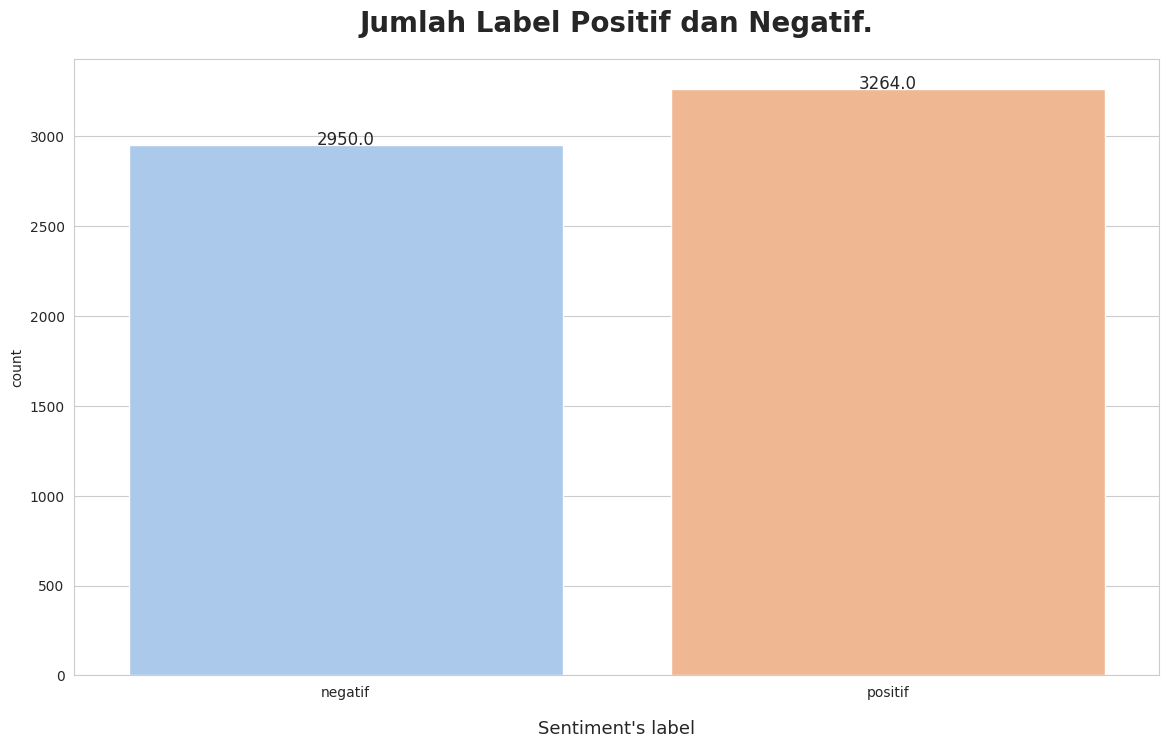

In [ ]:
# membuat visualisasi bar chart untuk menampilkan jumlah sentimen positif dan negatif

fig, ax = plt.subplots(figsize=(14,8))
ax = sns.countplot(x='polarity', data=blubca, palette="pastel")

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 3.25,rect.get_height(),horizontalalignment='center', fontsize = 12)

plt.title("Jumlah Label Positif dan Negatif.", fontsize=20, fontweight='bold',pad=20)
plt.xlabel("Sentiment's label", fontsize=13, labelpad=15)
plt.ylim(0)
plt.show()

In [ ]:
# mengonversikan sentimen menjadi 1 untuk positif dan -1 untuk negatif
polarity = []
for convert in blubca['polarity']:
  if convert == "positif":
    num_polarity = 1
  else:
    num_polarity = -1

  polarity.append(num_polarity)
blubca['polarity'] = polarity

In [ ]:
blubca['polarity']

0      -1
1      -1
2      -1
3      -1
4      -1
       ..
6209   -1
6210   -1
6211    1
6212   -1
6213    1
Name: polarity, Length: 6214, dtype: int64

In [ ]:
blubca.polarity.value_counts()

 1    3264
-1    2950
Name: polarity, dtype: int64

In [ ]:
print("percentage of sentiment:")
train_pct_pos = blubca.polarity.value_counts()[1]/blubca.polarity.value_counts().sum()*100
print("percentage of positive sentiment:", round(train_pct_pos,2), '%')

train_pct_neg = blubca.polarity.value_counts()[-1]/blubca.polarity.value_counts().sum()*100
print("percentage of negative sentiment:", round(train_pct_neg,2), '%')

print("difference between percentage positive and negative:", round(train_pct_pos-train_pct_neg,2), '%')

percentage of sentiment:
percentage of positive sentiment: 52.53 %
percentage of negative sentiment: 47.47 %
difference between percentage positive and negative: 5.05 %


### Sentiment WordCloud

#### Wordcloud sentimen positif



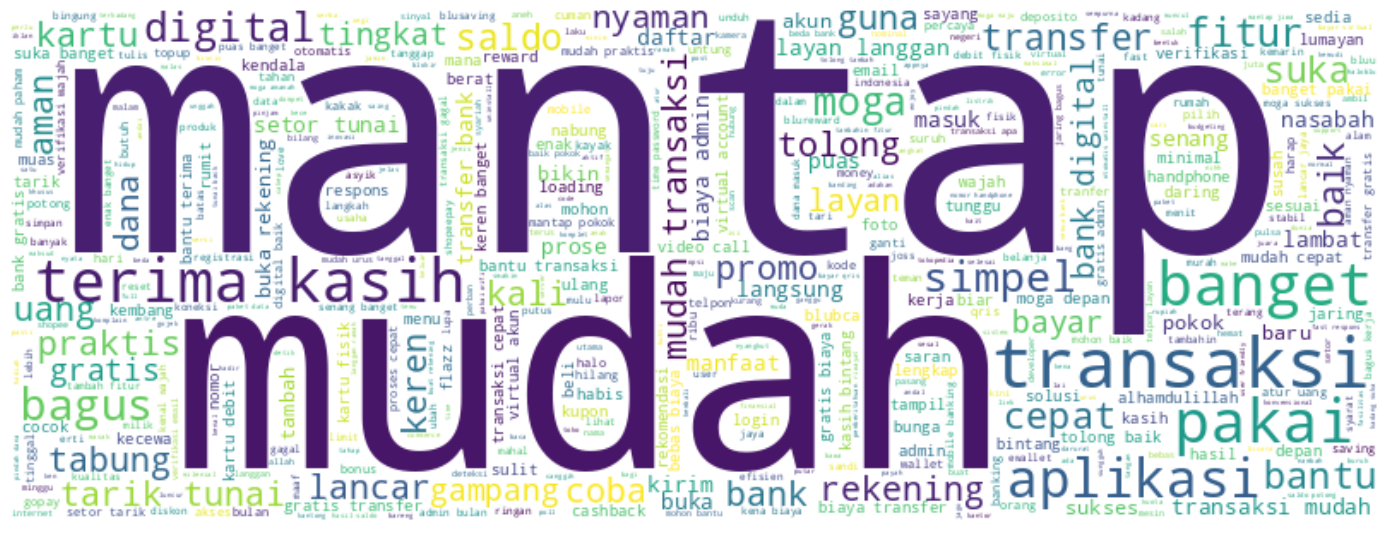

In [ ]:
sentiment_pos = ' '.join([review for review in blubca['stem_review'][blubca['polarity'] == 1]])

# create object wordcloud
w_pos = WordCloud(background_color="white",
                  width=800, height=300, max_font_size=200,
                  max_words=500).generate(sentiment_pos)

plt.figure(figsize=(14,8))
plt.axis("off")
plt.tight_layout()
plt.imshow(w_pos, interpolation="bilinear")
plt.show()

#### Wordcloud sentimen negatif

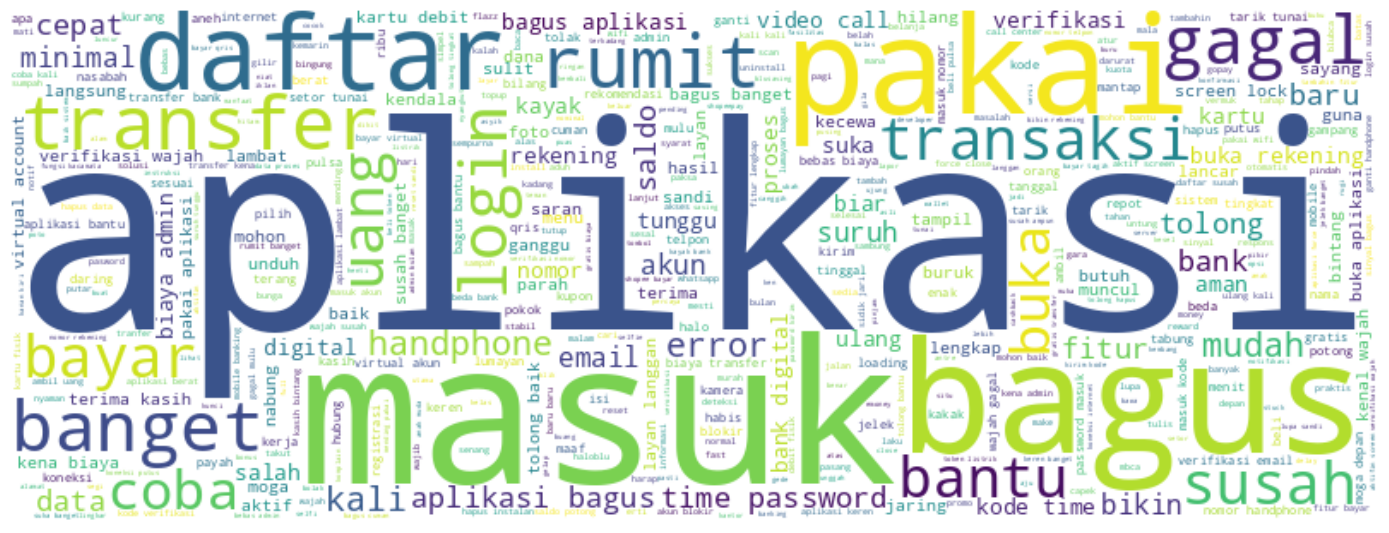

In [ ]:
sentiment_neg = ' '.join([review for review in blubca['stem_review'][blubca['polarity'] == -1]])

# create object wordcloud
w_neg = WordCloud(background_color="white",
                  width=800, height=300, max_font_size=200,
                  max_words=500).generate(sentiment_neg)

plt.figure(figsize=(14,8))
plt.axis("off")
plt.tight_layout()
plt.imshow(w_neg, interpolation="bilinear")
plt.show()

In [ ]:
blubca = blubca.replace('',np.nan, regex=True)

In [ ]:
blubca = blubca.dropna()

In [ ]:
blubca = blubca.reset_index(drop=True)

In [ ]:
blubca.to_excel("blubca_fix_dataset.xlsx", index=False)



---



# Split data train and test 80 : 20

In [ ]:
X = blubca['stem_review']
y = blubca['polarity']

In [ ]:
blubca.head()

,content,clean_review,normalization,final_text,token,stop_review,stem_review,prepos_text,polarity_score,polarity
0,Kenapa sekarang transfer sesama BCA kena biaya..,kenapa sekarang transfer sesama bca kena biaya,kenapa sekarang transfer sesama bca kena biaya,kenapa sekarang transfer sesama kena biaya,"[kenapa, sekarang, transfer, sesama, kena, biaya]","[transfer, kena, biaya]",transfer kena biaya,"[transfer, kena, biaya]",-3,-1
1,Hadeh biaya transfer ke sesama blu maupun BCA ...,hadeh biaya transfer ke sesama blu maupun bca ...,hadeh biaya transfer ke sesama blu maupun bca ...,hadeh biaya transfer sesama maupun sekarang...,"[hadeh, biaya, transfer, sesama, maupun, sekar...","[hadeh, biaya, transfer, dikenakan, transfer, ...",hadeh biaya transfer kena transfer minggu baru...,"[hadeh, biaya, transfer, kena, transfer, mingg...",-10,-1
2,Good,good,bagus,bagus,[bagus],[bagus],bagus,[bagus],-2,-1
3,"skrng sering di suruh update terus , sampek ke...",skrng sering di suruh update terus sampek kese...,sekarang sering di suruh diperbarui terus samp...,sekarang sering suruh diperbarui terus sampai...,"[sekarang, sering, suruh, diperbarui, terus, s...","[suruh, diperbarui, kesel, diperbarui, lambat,...",suruh baru kesel baru lambat buka hapusin filenya,"[suruh, baru, kesel, baru, lambat, buka, hapus...",-6,-1
4,Update melulu,update melulu,diperbarui melulu,diperbarui melulu,"[diperbarui, melulu]","[diperbarui, melulu]",baru melulu,"[baru, melulu]",-3,-1


## Data Splitting into data train and data test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=20)

In [ ]:
X_train.shape

(4971,)

In [ ]:
X_test.shape

(1243,)

In [ ]:
X_train

5711                nyaman banget fitur tarik tunai kartu
2731                          tolong emoney shopee banget
5802    aplikasi bagus videocall cepat tolong video ca...
1729    login buka aplikasi suruh daftar ulang suruh s...
1016                            jelek banget eror timbang
                              ...                        
5910            setor tarik tunai transfer ewallet scanqr
3915                                limit transfer tambah
1428    aplikasi bagus banget kadang sistem suka error...
4367                                                 puas
2522    lebih kena biaya bulan biaya gopay link dana k...
Name: stem_review, Length: 4971, dtype: object

In [ ]:
print(X_train)

5711                nyaman banget fitur tarik tunai kartu
2731                          tolong emoney shopee banget
5802    aplikasi bagus videocall cepat tolong video ca...
1729    login buka aplikasi suruh daftar ulang suruh s...
1016                            jelek banget eror timbang
                              ...                        
5910            setor tarik tunai transfer ewallet scanqr
3915                                limit transfer tambah
1428    aplikasi bagus banget kadang sistem suka error...
4367                                                 puas
2522    lebih kena biaya bulan biaya gopay link dana k...
Name: stem_review, Length: 4971, dtype: object


# Vector Representation

## TF IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=False)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)
dense_num = X_train_vect.todense()

In [ ]:
y_train.shape

(4971,)

In [ ]:
X_train_vect

<4971x3438 sparse matrix of type '<class 'numpy.float64'>'
	with 30176 stored elements in Compressed Sparse Row format>

In [ ]:
print(X_train_vect)

  (0, 1405)	0.4037394688196499
  (0, 3267)	0.4196400693653552
  (0, 3070)	0.4229344342700035
  (0, 959)	0.39047756829312924
  (0, 253)	0.30394903955213143
  (0, 2168)	0.48699627085245784
  (1, 2859)	0.6089556709082973
  (1, 888)	0.6428151297575722
  (1, 3193)	0.36887581018605203
  (1, 253)	0.2826523243898145
  (2, 242)	0.1897226352812352
  (2, 1907)	0.45045012761319425
  (2, 3009)	0.24233301408426278
  (2, 2020)	0.28344490174429043
  (2, 2589)	0.1963223859542813
  (2, 2145)	0.21541432153405035
  (2, 1374)	0.28781961813674434
  (2, 533)	0.23681992574075866
  (2, 3356)	0.24857348717819389
  (2, 571)	0.1854896872102852
  (2, 3357)	0.34140179269295845
  (2, 235)	0.1423421140304672
  (2, 161)	0.1251398532319164
  (2, 3193)	0.3866425173947878
  (3, 77)	0.2303474717108389
  :	:
  (4968, 2906)	0.29042361176144005
  (4968, 3310)	0.2951525270758379
  (4968, 904)	0.2396924052380324
  (4968, 2987)	0.2061342691768234
  (4968, 998)	0.20360534218223894
  (4968, 1632)	0.2366573843681101
  (4968, 1649)

In [ ]:
df_tf = pd.DataFrame(X_train_vect.todense(), columns = vectorizer.get_feature_names_out())
df_tf.to_excel('tfidf.xlsx', index=False, header=True)

# Data Modeling

In [ ]:
# Model Building multinomial Naive Bayes dan SVM
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
nb = MultinomialNB()
parameter_NB = {
    'alpha': [0],
    'force_alpha' : [True, False],
    'fit_prior': [True, False]
}
nb_search = GridSearchCV (nb, parameter_NB)
nb_search.fit(X_train_vect, y_train)

print("Parameter alpha terbaik :",nb_search.best_estimator_.get_params()["alpha"])
print("Parameter force alpha terbaik :",nb_search.best_estimator_.get_params()["force_alpha"])
print("Parameter fit prior terbaik :",nb_search.best_estimator_.get_params()["fit_prior"])

Parameter alpha terbaik : 0
Parameter force alpha terbaik : False
Parameter fit prior terbaik : False


/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:907: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:907: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:907: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:907: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:907: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric error

In [ ]:
#Predict the response for test sets
nb_prediction =  nb_search.predict(X_test_vect)

In [ ]:
print("Hasil Prediksi setelah Proses Pelatihan dengan Algoritma Naive Bayes : ")
nb_prediction

Hasil Prediksi setelah Proses Pelatihan dengan Algoritma Naive Bayes : 


array([-1, -1, -1, ..., -1,  1, -1])

In [ ]:
accuracy_score(nb_prediction,y_test)

0.8471440064360418

In [ ]:
print("Nilai Presisi dari Algoritma Naive Bayes")
print(precision_score(y_test, nb_prediction, average="weighted"), "\n")

print("Nilai Recall dari Algoritma Naive Bayes")
print(recall_score(y_test, nb_prediction, average="weighted"), "\n")

print("Nilai F1_Score dari Algoritma Naive Bayes")
print(f1_score(y_test, nb_prediction, average="weighted"))

Nilai Presisi dari Algoritma Naive Bayes
0.84832524669807 

Nilai Recall dari Algoritma Naive Bayes
0.8471440064360418 

Nilai F1_Score dari Algoritma Naive Bayes
0.8473636751014915


In [ ]:
print("Hasil Prediksi untuk Algoritma Naive Bayes")
print(classification_report(y_test, nb_prediction))

Hasil Prediksi untuk Algoritma Naive Bayes
              precision    recall  f1-score   support

          -1       0.82      0.86      0.84       566
           1       0.87      0.84      0.86       677

    accuracy                           0.85      1243
   macro avg       0.85      0.85      0.85      1243
weighted avg       0.85      0.85      0.85      1243



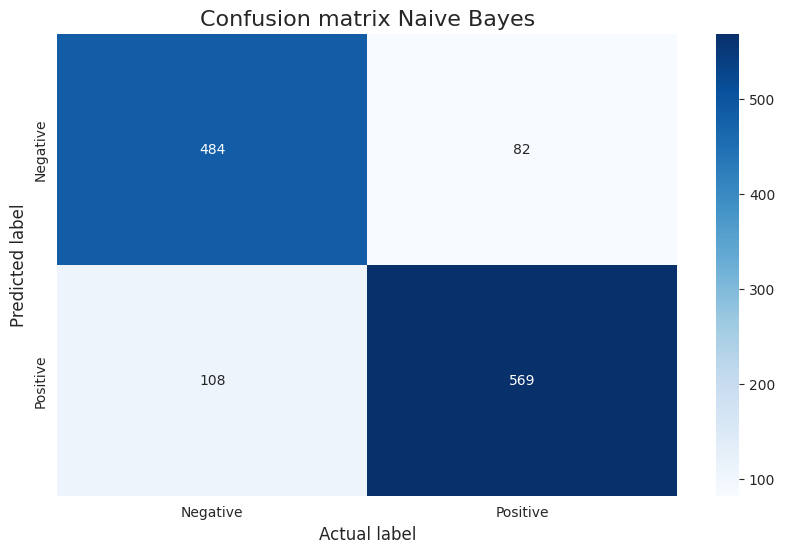

In [ ]:
cm = confusion_matrix(y_test,nb_prediction)

# plot confusion matrix
plt.figure(figsize=(10,6))
sentiment_classes = ['Negative', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d',
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix Naive Bayes', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)m
plt.show()

# Support Vector Machine

In [ ]:
svm = SVC()
parameter_SVM = {
      'C' : [1.0],
      'probability' : [True],
      'kernel' : ["rbf"],
      'gamma' : ["scale"]
  }
svm_search = GridSearchCV (svm, parameter_SVM)
svm_search.fit(X_train_vect,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1.0], 'gamma': ['scale'], 'kernel': ['rbf'],
                         'probability': [True]})

In [ ]:
svm_prediction =  svm_search.predict(X_test_vect)

In [ ]:
svm_prediction

array([-1, -1, -1, ...,  1,  1, -1])

In [ ]:
accuracy_score(svm_prediction,y_test)

0.9348350764279968

In [ ]:
print("Nilai Presisi dari Algoritma SVM")
print(precision_score(y_test, svm_prediction, average="weighted"), "\n")

print("Nilai Recall dari SVM")
print(recall_score(y_test, svm_prediction, average="weighted"), "\n")

print("Nilai F1_Score dari SVM")
print(f1_score(y_test, svm_prediction, average="weighted"))

Nilai Presisi dari Algoritma SVM
0.9360555848929959 

Nilai Recall dari SVM
0.9348350764279968 

Nilai F1_Score dari SVM
0.9349358107905367


In [ ]:
print("Hasil Prediksi untuk Algoritma SVM")
print(classification_report(y_test, svm_prediction))

Hasil Prediksi untuk Algoritma SVM
              precision    recall  f1-score   support

          -1       0.91      0.95      0.93       566
           1       0.96      0.92      0.94       677

    accuracy                           0.93      1243
   macro avg       0.93      0.94      0.93      1243
weighted avg       0.94      0.93      0.93      1243



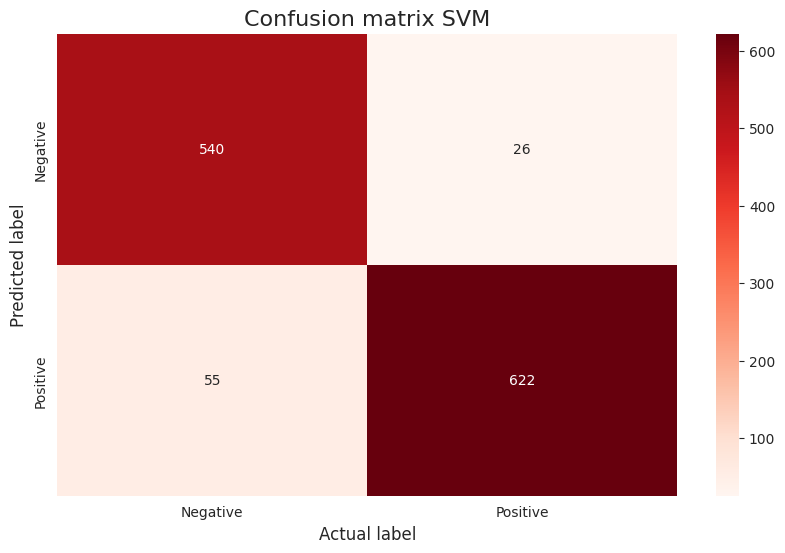

In [ ]:
cm = confusion_matrix(y_test,svm_prediction)

# plot confusion matrix
plt.figure(figsize=(10,6))
sentiment_classes = ['Negative', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Reds, annot=True, fmt='d',
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix SVM', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()

## Final the result of Predicted Naive Bayes

###Naive bayes

In [ ]:
nb_prediction = pd.DataFrame(nb_prediction, columns=['predictvalues'])
polarity = ""
sentimen = []
for sentiment in nb_prediction['predictvalues']:
  if sentiment == 1:
    polarity = "positif"
  else:
    polarity = "negatif"

  sentimen.append(polarity)

nb_prediction['sentimen'] = sentimen

print(nb_prediction.predictvalues.value_counts()[1])
print(nb_prediction.predictvalues.value_counts()[-1])

651
592


In [ ]:
nb_prediction_group = nb_prediction.groupby(['predictvalues'])[['sentimen']].count().reset_index()
nb_prediction_group

,predictvalues,sentimen
0,-1,592
1,1,651


In [ ]:
print("Number of sentiment after modelling:")
sen_pos = nb_prediction.predictvalues.value_counts()[1]/nb_prediction.predictvalues.value_counts().sum()*100
print("percentage of positive sentiment:", round(sen_pos,2), '%')

sen_neg = nb_prediction.predictvalues.value_counts()[-1]/nb_prediction.predictvalues.value_counts().sum()*100
print("percentage of negative sentiment:", round(sen_neg,2), '%')

print("difference between percentage positive and negative:", round(sen_pos-sen_neg,2), '%')

Number of sentiment after modelling:
percentage of positive sentiment: 52.37 %
percentage of negative sentiment: 47.63 %
difference between percentage positive and negative: 4.75 %


###SVM

In [ ]:
svm_prediction = pd.DataFrame(svm_prediction, columns=['predictvalues'])
polarity = ""
sentimen = []
for sentiment in svm_prediction['predictvalues']:
  if sentiment == 1:
    polarity = "positif"
  else:
    polarity = "negatif"

  sentimen.append(polarity)

svm_prediction['sentimen'] = sentimen

print(svm_prediction.predictvalues.value_counts()[1])
print(svm_prediction.predictvalues.value_counts()[-1])

648
595


In [ ]:
svm_prediction_group = svm_prediction.groupby(['predictvalues'])[['sentimen']].count().reset_index()
svm_prediction_group

,predictvalues,sentimen
0,-1,595
1,1,648


In [ ]:
print("Number of sentiment after modelling:")
sen_pos = svm_prediction.predictvalues.value_counts()[1]/svm_prediction.predictvalues.value_counts().sum()*100
print("percentage of positive sentiment:", round(sen_pos,2), '%')

sen_neg = svm_prediction.predictvalues.value_counts()[-1]/svm_prediction.predictvalues.value_counts().sum()*100
print("percentage of negative sentiment:", round(sen_neg,2), '%')

print("difference between percentage positive and negative:", round(sen_pos-sen_neg,2), '%')

Number of sentiment after modelling:
percentage of positive sentiment: 52.13 %
percentage of negative sentiment: 47.87 %
difference between percentage positive and negative: 4.26 %
